In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from keras import layers

加载MINIST数据集：

In [2]:
from keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

显示图片：

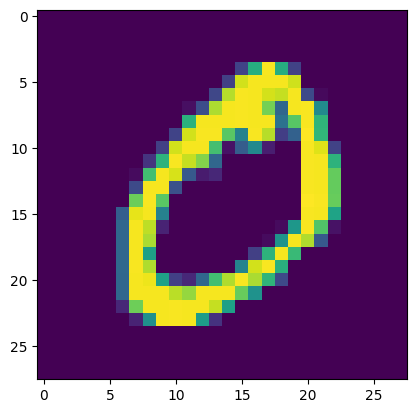

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])
plt.show()

数据预处理：

In [4]:
img_x, img_y = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
#将标签转换为独热编码
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

定义模型结构：

In [5]:
model = Sequential()

#第一个卷积层：64个3*3滤波器
model.add(Conv2D(64, kernel_size=(3,3), padding='same',activation='relu', input_shape = (img_x, img_y, 1)))
#添加批量归一化
model.add(layers.BatchNormalization())
#最大池化层
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#丢弃率设为0.2
model.add(layers.Dropout(0.2))

#第二个卷积层：128个3*3滤波器
model.add(Conv2D(128, kernel_size=(3,3), padding='same',activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Dropout(0.2))

#第三个卷积层：256个3*3滤波器
model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Dropout(0.3))

model.add(Flatten())
#全连接层：512个神经元
model.add(Dense(512,activation='relu'))
model.add(layers.Dropout(0.3))
#输出层：10个神经元（数字0-9）
model.add(Dense(10, activation='softmax'))
print(model.summary())

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,556,746 (5.94 MB)

 Trainable params: 1,555,850 (5.94 MB)

 Non-trainable params: 896 (3.50 KB)

None


编译模型：

In [6]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

训练模型：

In [7]:
history=model.fit(x_train, y_train, batch_size=128, epochs=10)

Epoch 1/10


I0000 00:00:1734256328.285097    4659 service.cc:145] XLA service 0x7a78b0003a40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734256328.285158    4659 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 24/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3350 - loss: 4.1229

I0000 00:00:1734256334.697430    4659 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.8426 - loss: 0.7340
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9779 - loss: 0.0727
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9839 - loss: 0.0510
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9865 - loss: 0.0449
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9874 - loss: 0.0388
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9906 - loss: 0.0321
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9896 - loss: 0.0339
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9914 - loss: 0.0293
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9917 - loss: 0.0284
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9933 - loss: 0.0214


在测试集上的分类准确率：

In [8]:
score = model.evaluate(x_test, y_test)
print('acc', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9920 - loss: 0.0281
acc 0.9939000010490417


可视化的训练集上的准确率

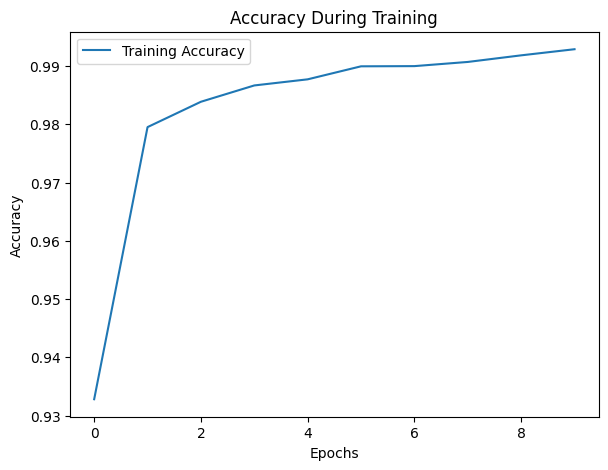

In [9]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()